# Main Charts in Data Analysis

## Data Exploratory

In [1]:
# download dataset
!wget https://raw.githubusercontent.com/Njmondoa/Superstore-Sales-Analysis/main/SuperStore_data.csv

--2023-07-07 11:45:10--  https://raw.githubusercontent.com/Njmondoa/Superstore-Sales-Analysis/main/SuperStore_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2300789 (2.2M) [text/plain]
Saving to: ‘SuperStore_data.csv’

SuperStore_data.csv 100%[===================>]   2.19M  --.-KB/s    in 0.06s   

2023-07-07 11:45:11 (34.1 MB/s) - ‘SuperStore_data.csv’ saved [2300789/2300789]



In [57]:
# load and read the dataset
import pandas as pd
df = pd.read_csv('SuperStore_data.csv')

In [3]:
df.shape

(10296, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10296 non-null  object 
 1   Order ID       10296 non-null  object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quanti

## Pie Chart

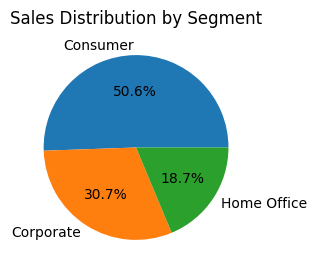

In [7]:
import matplotlib.pyplot as plt

# Calculate total sales for each segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()

# Create pie chart
plt.figure(figsize=(3, 3), dpi=100)
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Segment')
plt.show()

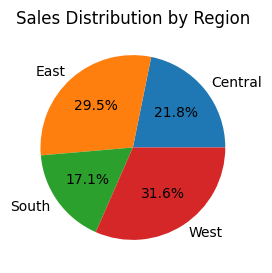

In [8]:
# Calculate total sales for each region
sales_by_region = df.groupby('Region')['Sales'].sum()

# Create pie chart
plt.figure(figsize=(3, 3), dpi=100)
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

## Bar Chart | Clustered Bar Chart | Stacked Bar Chart

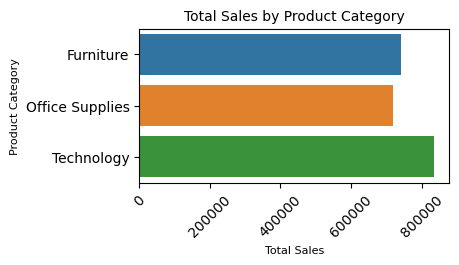

In [9]:
from numpy import size
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Create horizontal bar chart
plt.figure(figsize=(4, 2), dpi=100)
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, orient='h')
plt.xticks(rotation=45)
plt.xlabel('Total Sales', size=8)
plt.ylabel('Product Category', size=8)
plt.title('Total Sales by Product Category', size=10)
plt.show()

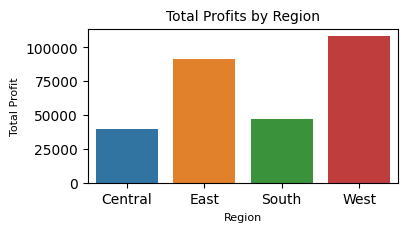

In [10]:
# Calculate total profits for each region
profits_by_region = df.groupby('Region')['Profit'].sum()

# Create vertical bar chart
plt.figure(figsize=(4, 2), dpi=100)
sns.barplot(x=profits_by_region.index, y=profits_by_region.values, orient='v')
plt.xlabel('Region', size=8)
plt.ylabel('Total Profit', size=8)
plt.title('Total Profits by Region', size=10)
plt.show()

In [11]:
# Calculate total sales and profits for each category
sales_and_profits_by_category = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
# Melt the data
melted_data = pd.melt(sales_and_profits_by_category, id_vars="Category", value_name="Total", var_name="Type")

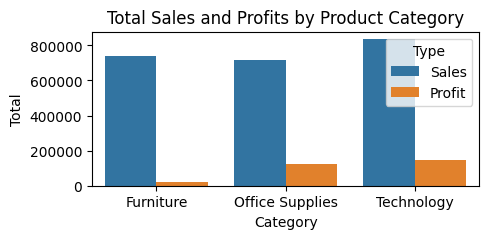

In [12]:
plt.figure(figsize=(5, 2), dpi=100)
sns.barplot(x='Category', y='Total', hue='Type', data=melted_data)
plt.title('Total Sales and Profits by Product Category')
plt.show()

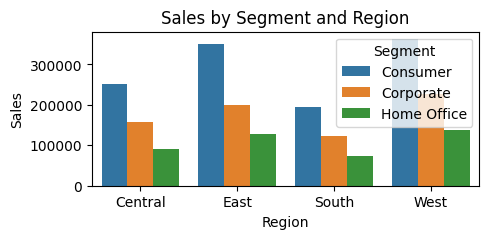

In [13]:
# Calculate total sales for each segment in each region
sales_by_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(5, 2), dpi=100)
sns.barplot(x='Region', y='Sales', hue='Segment', data=sales_by_region_segment)
plt.title('Sales by Segment and Region')
plt.show()

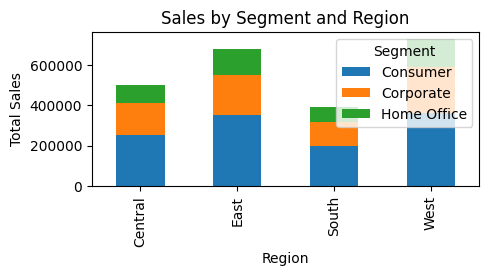

In [14]:
# Calculate total sales for each segment in each region
sales_by_region_segment = df.groupby(['Region', 'Segment'])['Sales'].sum().unstack()
sales_by_region_segment.plot(kind='bar', stacked=True, figsize=(5, 2))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Segment and Region')
plt.show()

## Histogram

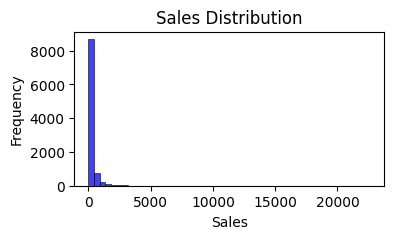

In [15]:
plt.figure(figsize=(4, 2), dpi=100)
sns.histplot(df['Sales'], bins=50, kde=False, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

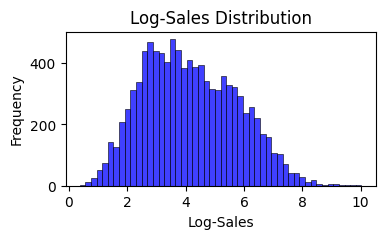

In [16]:
import numpy as np
plt.figure(figsize=(4, 2), dpi=100)
sns.histplot(np.log1p(df['Sales']), bins=50, kde=False, color='blue')
plt.title('Log-Sales Distribution')
plt.xlabel('Log-Sales')
plt.ylabel('Frequency')
plt.show()

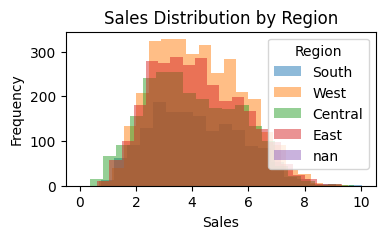

In [17]:
# Plot a histogram of sales for each region
plt.figure(figsize=(4, 2), dpi=100)
regions = df['Region'].unique()  # Get unique regions from the dataset

# Iterate over each region and plot a histogram
for region in regions:
    region_sales = df[df['Region'] == region]['Sales']  # Filter sales data for the current region
    plt.hist(np.log1p(region_sales), bins=20, alpha=0.5, label=region)  # Plot histogram for the current region

plt.title('Sales Distribution by Region')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Region')
plt.show()

## Line Chart

In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Resample by month and sum sales and profit
monthly_data = df.resample('M').sum()

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot sales
ax[0].plot(monthly_data.index, monthly_data['Sales'], color='blue')
ax[0].set_title('Monthly Sales')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

# Plot profit
ax[1].plot(monthly_data.index, monthly_data['Profit'], color='green')
ax[1].set_title('Monthly Profit')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-19-63ea9afbde34>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df.resample('Y').sum()


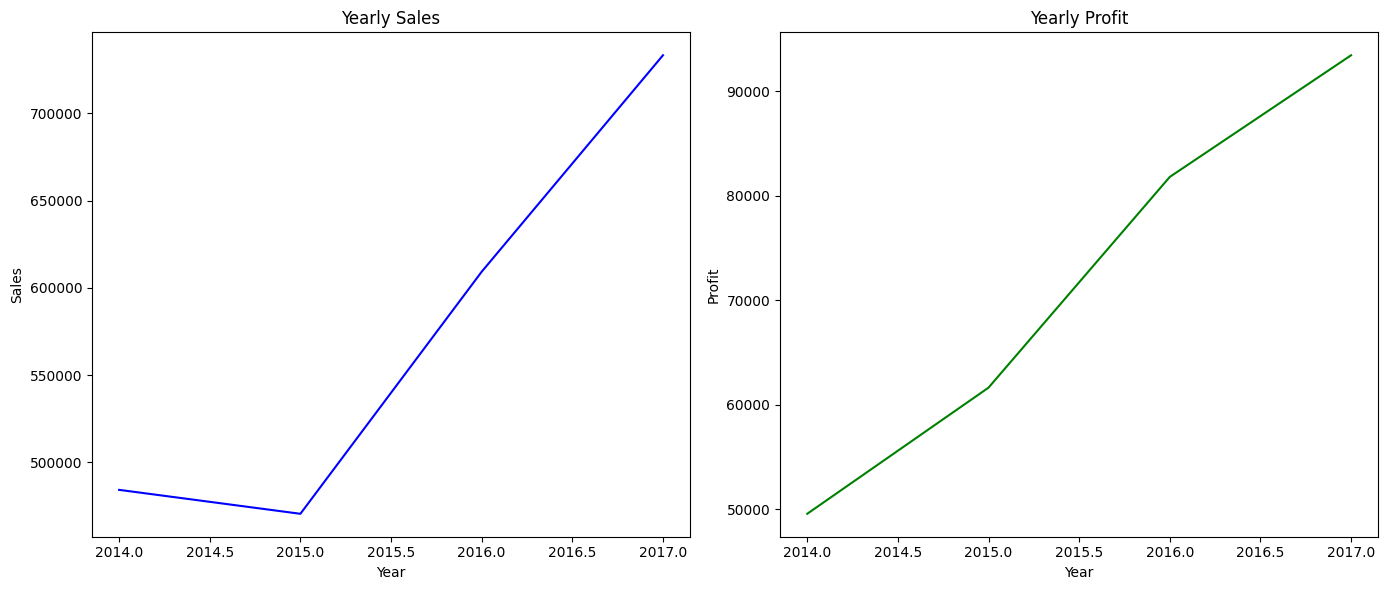

In [19]:
# Resample by year and sum sales and profit
yearly_data = df.resample('Y').sum()

# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot sales
ax[0].plot(yearly_data.index.year, yearly_data['Sales'], color='blue')
ax[0].set_title('Yearly Sales')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Sales')

# Plot profit
ax[1].plot(yearly_data.index.year, yearly_data['Profit'], color='green')
ax[1].set_title('Yearly Profit')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Profit')

# Show the plot
plt.tight_layout()
plt.show()

## Scatter Plot

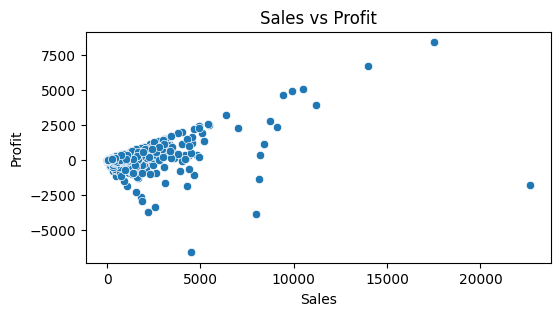

In [20]:
plt.figure(figsize=(6, 3), dpi=100)
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

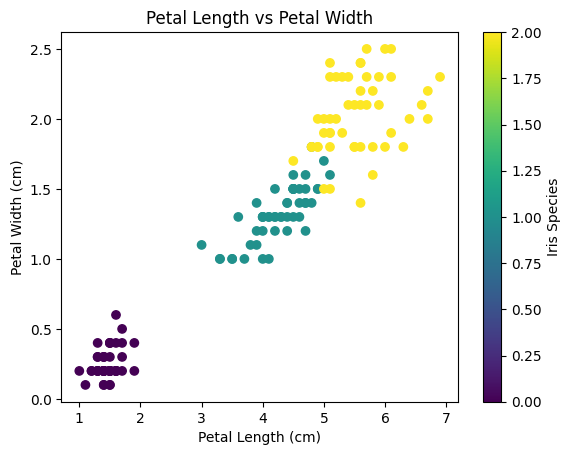

In [50]:
from sklearn.datasets import load_iris
data = load_iris()
# Extract the features (petal length and width)
petal_length = data.data[:, 2]  # Column index 2 corresponds to petal length
petal_width = data.data[:, 3]   # Column index 3 corresponds to petal width
labels = data.target            # Labels of the iris species

# Create a scatter plot
plt.scatter(petal_length, petal_width, c=labels, cmap='viridis')

# Add labels and title to the plot
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

# Show the plot
plt.colorbar(label='Iris Species')
plt.show()

## BoxPlot

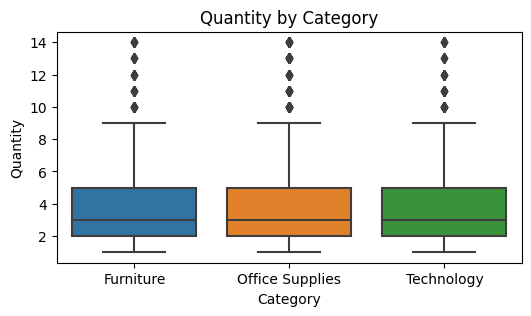

In [58]:
plt.figure(figsize=(6, 3), dpi=100)
sns.boxplot(x='Category', y='Quantity', data=df)
plt.title('Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()


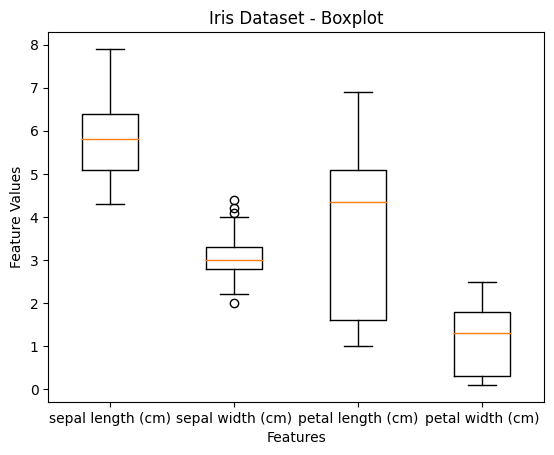

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data

# Create a boxplot
plt.boxplot(X, labels=data.feature_names)

# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.title('Iris Dataset - Boxplot')

# Show the plot
plt.show()
